In [2]:
from matplotlib.axis import YAxis
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import math
import json

In [3]:
#Import rib.gg Data
df = pd.read_csv(r"C:\Users\Renzjordan\OneDrive\MiniProj\VALImpact\data\VCT-NA-2022-Stage-2-Challengers-ImpactEssentialPlayerData.csv")

In [4]:
#Set Attack Team Win target variable
df['ATKWin'] = 0
for i in range(0, len(df)):

    if(df.loc[i, 'attackingTeamNumber'] == df.loc[i, 'winningTeamNumber']):
        df.loc[i, 'ATKWin'] = 1

In [5]:
#Seperate Independent and Dependent Variables
indVars = df.drop(columns=['roundId_x', 'attackingTeamNumber', 'winningTeamNumber','ATKWin', 'playerId', 'assistants', 'victimId'])
depVar = df[['matchId_y', 'ATKWin']]

In [6]:
#Train on group stage
X_train = indVars[indVars['matchId_y'] < 69969].drop(columns=['matchId_y'])
Y_train = depVar[depVar['matchId_y'] < 69969].drop(columns=['matchId_y'])

X_test = indVars[indVars['matchId_y'] == 68482].drop(columns=['matchId_y'])
y_test = depVar[depVar['matchId_y'] == 68482].drop(columns=['matchId_y'])

In [7]:
#do Logisistic Regression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train.values.ravel())

LogisticRegression()

In [8]:
#EG vs OPTC Ascent
print(df[df['matchId_y'] == 68482])

       matchId_y  roundId_x  attackingTeamNumber  roundTime  ATKAlive  \
11126      68482    1065682                    1     100000         5   
11127      68482    1065682                    1      84423         5   
11128      68482    1065682                    1      83026         4   
11129      68482    1065682                    1          0         4   
11130      68482    1065682                    1      -3373         3   
...          ...        ...                  ...        ...       ...   
11331      68482    1065705                    2      95576         4   
11332      68482    1065705                    2      74813         3   
11333      68482    1065705                    2      71993         2   
11334      68482    1065705                    2      58864         1   
11335      68482    1065705                    2      53570         0   

       DEFAlive  ATKLoadoutValue  DEFLoadoutValue  winningTeamNumber  \
11126         5      3600.000000      3750.000000  

In [9]:
#Transform Bomb Time from (100000 to -450000) -> (0 to 1)
def NormalizeData(data):
    # return (data - np.max(data)) / (np.min(data) - np.max(data))
    return (data - np.max(data)) / (-45000 - np.max(data))

In [10]:
#Set X-axis for graph (round + event time)
xAx = df[df['matchId_y'] == 68482]['roundId_x']-df[df['matchId_y'] == 68482]['roundId_x'][df[df['matchId_y'] == 68482].index[0]] +1 + NormalizeData(df[df['matchId_y'] == 68482]['roundTime'])


In [11]:
#Find index of round 13
halftime = xAx.loc[xAx==13].index[0] - xAx.loc[xAx==1].index[0]
#print(xAx.head(60))

11126    1.000000
11127    1.107428
11128    1.117062
11129    1.689655
11130    1.712917
11131    1.776621
11132    1.791903
11133    1.795683
11134    1.799193
11135    1.909179
11136    1.971069
11137    2.000000
11138    2.053497
11139    2.072828
11140    2.076228
11141    2.080683
11142    2.091876
11143    2.113531
11144    3.000000
11145    3.089359
11146    3.228469
11147    3.243338
11148    3.689655
11149    3.807531
11150    3.813069
11151    3.819159
11152    3.836814
11153    3.866703
11154    4.000000
11155    4.452262
11156    4.460807
11157    4.467800
11158    4.470752
11159    4.476807
11160    4.689655
11161    4.725290
11162    4.774338
11163    4.793083
11164    5.000000
11165    5.097986
11166    5.107297
11167    5.114669
11168    5.122731
11169    5.170745
11170    5.179214
11171    5.181724
11172    5.689655
11173    5.708683
11174    6.000000
11175    6.087979
11176    6.152400
11177    6.155448
11178    6.162214
11179    6.689655
11180    6.733972
11181    6

In [12]:
#Get probability of [0, 1]
y_pred=logreg.predict_proba(X_test)
print(y_pred)

[[0.62019481 0.37980519]
 [0.54214973 0.45785027]
 [0.59845784 0.40154216]
 [0.49034778 0.50965222]
 [0.52544747 0.47455253]
 [0.55918055 0.44081945]
 [0.60128116 0.39871884]
 [0.55764698 0.44235302]
 [0.51000925 0.48999075]
 [0.53509858 0.46490142]
 [0.52331326 0.47668674]
 [0.94389155 0.05610845]
 [0.94787307 0.05212693]
 [0.95277553 0.04722447]
 [0.95265847 0.04734153]
 [0.89493305 0.10506695]
 [0.91662745 0.08337255]
 [0.92860664 0.07139336]
 [0.27001766 0.72998234]
 [0.12244078 0.87755922]
 [0.29683223 0.70316777]
 [0.11329484 0.88670516]
 [0.08327508 0.91672492]
 [0.22288012 0.77711988]
 [0.13794507 0.86205493]
 [0.34894006 0.65105994]
 [0.18719771 0.81280229]
 [0.08929326 0.91070674]
 [0.42113902 0.57886098]
 [0.5966106  0.4033894 ]
 [0.83177332 0.16822668]
 [0.60691493 0.39308507]
 [0.35422813 0.64577187]
 [0.16277213 0.83722787]
 [0.14179824 0.85820176]
 [0.05545681 0.94454319]
 [0.15987342 0.84012658]
 [0.07553465 0.92446535]
 [0.10427689 0.89572311]
 [0.26657689 0.73342311]


In [13]:
#Get probabilities for home team
if(df[df['matchId_y'] == 68482].iloc[0]['attackingTeamNumber'] == 1):
    firstHalf = [item[1] for item in y_pred[:halftime]]
    secHalf = [item[0] for item in y_pred[halftime:]]
else:
    firstHalf = [item[0] for item in y_pred[:halftime]]
    secHalf = [item[1] for item in y_pred[halftime:]]

In [14]:
#Sey y-axis for graph
yAx = firstHalf + secHalf
#print(yAx)

In [15]:
#Get final round number
final = math.ceil(xAx.iloc[-1])

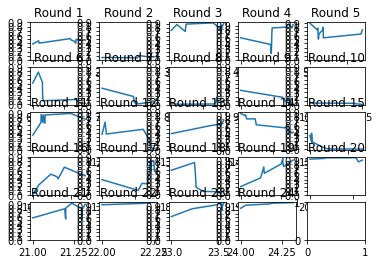

In [16]:
%matplotlib inline

#Set up enough plots for each round
figure, axis = plt.subplots(5, 5)

# Plot x, y for each round graph
round = 1
for i in range(5):
    for j in range(5):
        # print(xAx.loc[xAx==round].index[0])
        # print(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]])
        if(round!=final-1):
            # if(i==3 and j==2):
            #     print(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]-1])
            #     print(yAx[xAx.loc[xAx==round].index[0]-xAx.loc[xAx==1].index[0]:xAx.loc[xAx==round+1].index[0]-xAx.loc[xAx==1].index[0]])
            axis[i, j].plot(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]-1], yAx[xAx.loc[xAx==round].index[0]-xAx.loc[xAx==1].index[0]:xAx.loc[xAx==round+1].index[0]-xAx.loc[xAx==1].index[0]])
            axis[i, j].set_title("Round " + str(round))  
            # axis[i, j].set_xticks(xAx.loc[xAx.loc[xAx==round].index[0]:xAx.loc[xAx==round+1].index[0]-1])
        else:
            axis[i, j].plot(xAx.loc[xAx.loc[xAx==round].index[0]:], yAx[xAx.loc[xAx==round].index[0]-xAx.loc[xAx==1].index[0]:])
            axis[i, j].set_title("Round " + str(round))
            # axis[i, j].set_xticks(xAx.loc[xAx.loc[xAx==round].index[0]:])


        # axis[i, j].ylim(0, 1) 
        axis[i, j].set_yticks(np.arange(0, 1, step=0.1)) 
        

        round += 1  
        if(round == final):
            break
    if(round == final):
        break
# plt.plot(xAx, yAx)
# plt.xlabel('Round')
# plt.ylabel('Win Prob')
  
# plt.title('EG vs OPTC')
plt.show()

In [17]:
#Import player data for each match
playerData = pd.read_csv(r"C:\Users\Renzjordan\OneDrive\MiniProj\VALImpact\data\VCT-NA-2022-Stage-2-Challengers-PlayerData.csv")

#create impact df
playerImpact = df[['matchId_y', 'roundId_x', 'attackingTeamNumber', 'playerId', 'assistants', 'victimId']]
playerImpact = playerImpact[playerImpact['matchId_y'] == 68482]
playerImpact['impact'] = 0

In [18]:
#Calculate impact for each player
for i in range(0, len(playerImpact)):
    
    matchId = playerImpact.loc[playerImpact.index[0]+i, 'matchId_y']
    playerId = playerImpact.loc[playerImpact.index[0]+i, 'playerId'] 

    if(not math.isnan(playerId)):
        # print(matchId, playerId)
        # print(playerData[((playerData['matchId'] == matchId) & (playerData['playerId'] == playerId))]['teamNumber'].values)
    
        playerImpact.loc[playerImpact.index[0]+i, 'impact'] = abs(yAx[i]-yAx[i-1])
    
    else:
        pass

In [19]:
#Get player info
playerNames = pd.read_csv(r"C:\Users\Renzjordan\OneDrive\MiniProj\VALImpact\data\VCTPlayers.csv")

In [20]:
#gVR = Victim impact by round, gVM = Victim impact by match
gVR = playerImpact.groupby(['roundId_x', 'victimId'])['impact'].sum().reset_index()
gVM = playerImpact.groupby(['victimId'])['impact'].sum().reset_index()

print(gVM.head(10))

   victimId    impact
0     398.0  1.617545
1    1023.0  1.451686
2    2483.0  1.786784
3    2716.0  2.409579
4    2841.0  1.437873
5    2882.0  1.567195
6    3211.0  2.436258
7    3842.0  2.592707
8    4157.0  1.838671
9   11672.0  2.123989


In [21]:
#Getting impact for assistants + split individual impact
playerImpact['impact_assist'] = 0
for i in range(0, len(playerImpact)):
    if(len(json.loads(playerImpact.loc[playerImpact.index[0] + i, 'assistants'])) > 0):
        playerImpact.loc[playerImpact.index[0]+i,'impact_assist'] = playerImpact.loc[playerImpact.index[0] + i, 'impact'] * (0.30 / len(json.loads(playerImpact.loc[playerImpact.index[0] + i, 'assistants'])))
        playerImpact.loc[playerImpact.index[0]+i,'impact'] -= playerImpact.loc[playerImpact.index[0] + i, 'impact'] * (0.30)

In [22]:
#Create assistant impact dataframe
ass = pd.DataFrame(pd.np.empty((0, 8)))
ass.columns = playerImpact.columns.tolist()

for i in range(0, len(playerImpact)):
    for p in (json.loads(playerImpact.loc[playerImpact.index[0] + i, 'assistants'])):
        # print(p)
        row =  pd.DataFrame([{'matchId_y': playerImpact.loc[playerImpact.index[0]+i,'matchId_y'],
         'roundId_x': playerImpact.loc[playerImpact.index[0]+i,'roundId_x'], 
         'attackingTeamNumber': playerImpact.loc[playerImpact.index[0]+i,'attackingTeamNumber'],
         'playerId': p,
         'assistants': [],
         'victimId': playerImpact.loc[playerImpact.index[0]+i,'victimId'],
         'impact': playerImpact.loc[playerImpact.index[0]+i,'impact_assist']}])
        ass = pd.concat([ass, row])
        print(row)

ass['impact_assist'] = 0


C:\Users\Renzjordan\AppData\Local\Temp\ipykernel_10160\720036083.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ass = pd.DataFrame(pd.np.empty((0, 8)))


   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      68482    1065682                    1       398         []    3842.0   

     impact  
0  0.016892  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      68482    1065682                    1      2483         []   11672.0   

    impact  
0  0.01263  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      68482    1065682                    1      3842         []    3211.0   

     impact  
0  0.007146  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      68482    1065682                    1     11672         []    3211.0   

     impact  
0  0.007146  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  victimId  \
0      68482    1065683                    1       398         []    2882.0   

     impact  
0  0.001471  
   matchId_y  roundId_x  attackingTeamNumber  playerId assistants  

In [24]:
#Impact by match

gA = ass.groupby(['playerId'])['impact'].sum().reset_index()

gP = playerImpact.groupby(['playerId'])['impact'].sum().reset_index()

# print(gP.head(20))
#print(gVM.head(20))
#print(gP.head(20))
#print(gA.head(20))

gP['impact'] = gP['impact'] + gA['impact'] - gVM['impact']

gP = pd.merge(gP, playerNames, how='left', left_on = 'playerId', right_on = 'Player Id')



print(gP.sort_values('impact', ascending=False))

   playerId    impact  Player Id       Ign           Team
1    1023.0  1.144247       1023   Boostio  Evil Geniuses
0     398.0  0.903838        398    Marved   OpTic Gaming
5    2882.0  0.645254       2882       C0M  Evil Geniuses
2    2483.0  0.257045       2483  crashies   OpTic Gaming
4    2841.0  0.187280       2841       FNS   OpTic Gaming
3    2716.0  0.018079       2716       yay   OpTic Gaming
8    4157.0 -0.049725       4157   jawgemo  Evil Geniuses
7    3842.0 -0.576337       3842     Apoth  Evil Geniuses
9   11672.0 -0.588597      11672  Reformed  Evil Geniuses
6    3211.0 -1.354904       3211    Victor   OpTic Gaming
